domingo 16 de mayo de 2019  
  
_Benjamín Hernández Cortés_ - _Juan Pablo Rojas Rojas_  
_Departamento de Ingeniería Informática (DIINF)_  
_Universidad de Santiago de Chile (USACH)_


## Laboratorio 3 - Fundamentos de Aprendizaje Profundo con Redes Neuronales
___

El presente código está orientado hacia la implementación de una red neuronal convolucional o CNN (Convolutional Neural Network), la cual será diseñada y empleada con el fin de clasificar un conjunto de 25.000 imagenes de perros y gatos, que pueden ser descargados a través del siguiente enlace: [Kaggle Cats and Dogs Dataset](https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765).


#### Importación de bibliotecas
---

Las bibliotecas a emplear son:
- **os:** Manejo de funcionalidades dependientes del sistema operativo
- **numpy:** Herramienta de computación científica, que permite trabajar a través de vectores
- **matplotlib:** Visualización gráfica de diversos datos de interés
- **tensorflow:** Diseño e implementación de la red neuronal convolucional
- **cv2:** Manejo del conjunto de imagenes
- **random:** Uso de funciones relacionadas con la aleatoriedad
- **tqdm:** Barra de progreso interactiva

### ¡PRECAUCIONES!
---

Para asegurar el correcto funcionamiento de la herramienta, es necesario tener en cuenta las siguientes precauciones y las acciones a tomar, para el reparar algunas funcionalidades que podrían presentar problemas.

| <p style='text-align: left;'>**Error**</p>  | <p style='text-align: left;'>**Descripción**</p> |
| ------------ | ------------ |
| <p style='text-align: justify;'>`UnboundLocalError: local variable 'photoshop' referenced before assignment`</p> |  <p style='text-align: justify;'>Este mensaje de error se presenta al momento de utilizar la clase _ImageDataGenerator_ de _tensorflow.keras.preprocessing.image_. Este error puede ser reparado haciendo una leve modificación al archivo _JpegImagePlugin.py_ asociado a la biblioteca _PIL_, siguiendo los pasos indicados en este [post](https://github.com/python-pillow/Pillow/pull/3771#issuecomment-485104596).</p>|
| <p style='text-align: justify;'>`Problema al obtener/cargar las imagenes`</p> |  <p style='text-align: justify;'>El conjunto de imagenes indicado al principio de este trabajo ([Kaggle Cats and Dogs Dataset](https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765)), posee un par de imagenes que no contienen información y por lo tanto, no pueden ser empleadas. Las imagenes en cuestión son _/PetImages/Cat/666.jpg_ y _/PetImages/Dog/11702.jpg_. Se recomienda que elimine las imagenes anteriormente indicadas, previo a la ejecución de este archivo.</p>|

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import warnings

from random import shuffle
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization

warnings.filterwarnings('ignore')

In [2]:
IMAGE_SIZE = 60
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 1)

datagen = ImageDataGenerator(rescale=1.0/255.0,
                             validation_split=0.3)

# Conjunto de prueba
training_dataset = datagen.flow_from_directory('PetImages/',
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=100,
                                               color_mode='grayscale',
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')

# Conjunto de validación
validation_dataset = datagen.flow_from_directory('PetImages/',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size=100,
                                                 color_mode='grayscale',
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='validation')



model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(60,60,1)))

model.add(MaxPooling2D(pool_size=(3, 3)))

#model.add(Activation('relu'))

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(60,60,1)))

model.add(MaxPooling2D(pool_size=(3, 3)))

#model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Detalle del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit_generator(training_dataset,
                              steps_per_epoch=len(training_dataset),
                              epochs = 5,
                              validation_steps = len(validation_dataset),
                              validation_data = validation_dataset);

# Guardado del modelo
model.save("model_lab3.h5")

Found 17500 images belonging to 2 classes.
Found 7498 images belonging to 2 classes.
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)           

### Visualización de los resultados
___

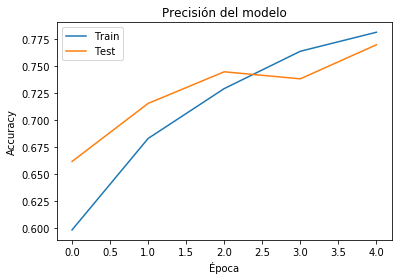

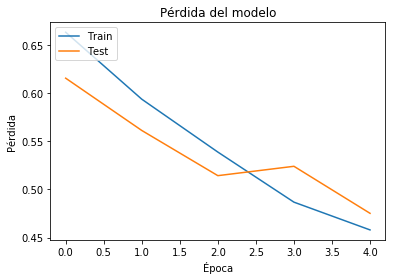

In [9]:
# Figura 1 - Valores de precisión para los conjuntos de entrenamiento y validación.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Precisión del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Época')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Figura 2 - Valores de pérdida para los conjuntos de entrenamiento y validación.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Prueba del modelo

In [11]:
test_dataset = datagen.flow_from_directory('Datos de prueba/',
                                           target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                           batch_size=100,
                                           color_mode='grayscale',
                                           class_mode='categorical',
                                           shuffle=True)

Found 17 images belonging to 2 classes.
